# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Latitude": city_lat,
                          "Longitude": city_lng,
                          "Max Temp (°C)": city_max_temp - 273.15, #Converts kelvin to celsius
                          "Humidity %": city_humidity,
                          "Cloudiness %": city_clouds,
                          "Wind Speed (m/s)": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | berezovyy
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | grand falls-windsor
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | hassi messaoud
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | susuman
Processing Record 10 of Set 1 | tura
Processing Record 11 of Set 1 | la foa
Processing Record 12 of Set 1 | berbera
Processing Record 13 of Set 1 | kagizman
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | afaahiti
Processing Record 16 of Set 1 | kourou
Processing Record 17 of Set 1 | hingorja
Processing Record 18 of Set 1 | jatai
Processing Record 19 of Set 1 | impfondo
Processing Record 20 of Set 1 | flying fish cove
Processing Record 21 of Set 1 | aasiaat
Processing Record 22 of Set 1 | puerto ayora
Processing Rec

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City                556
Latitude            556
Longitude           556
Max Temp (°C)       556
Humidity %          556
Cloudiness %        556
Wind Speed (m/s)    556
Country             556
Date                556
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp (°C),Humidity %,Cloudiness %,Wind Speed (m/s),Country,Date
0,berezovyy,51.6667,135.7000,-1.46,35,0,2.29,RU,1731469466
1,olonkinbyen,70.9221,-8.7187,-3.88,75,100,14.30,SJ,1731469467
2,margaret river,-33.9500,115.0667,22.60,51,47,4.46,AU,1731469469
3,grand falls-windsor,48.9332,-55.6649,5.28,92,100,2.68,CA,1731469325
4,waitangi,-43.9535,-176.5597,13.23,73,0,3.13,NZ,1731469471


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp (°C),Humidity %,Cloudiness %,Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,berezovyy,51.6667,135.7000,-1.46,35,0,2.29,RU,1731469466
1,olonkinbyen,70.9221,-8.7187,-3.88,75,100,14.30,SJ,1731469467
2,margaret river,-33.9500,115.0667,22.60,51,47,4.46,AU,1731469469
3,grand falls-windsor,48.9332,-55.6649,5.28,92,100,2.68,CA,1731469325
4,waitangi,-43.9535,-176.5597,13.23,73,0,3.13,NZ,1731469471


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

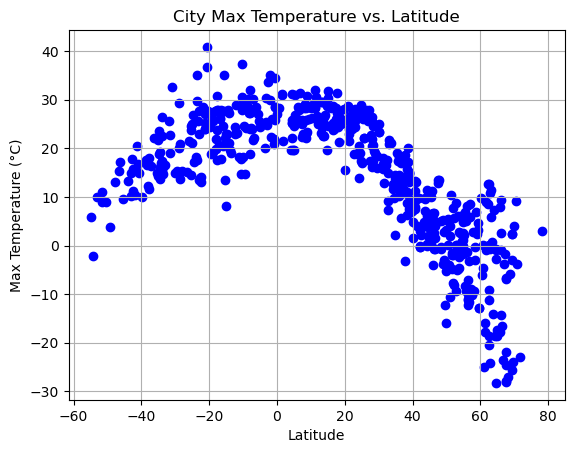

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temp (°C)'], marker='o', color='blue')

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

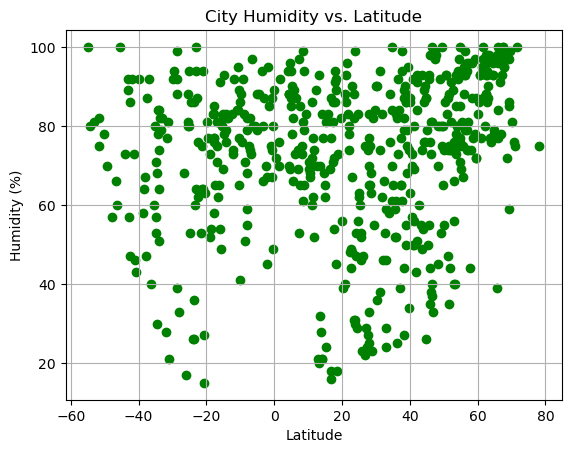

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity %'], marker='o', color='green')

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

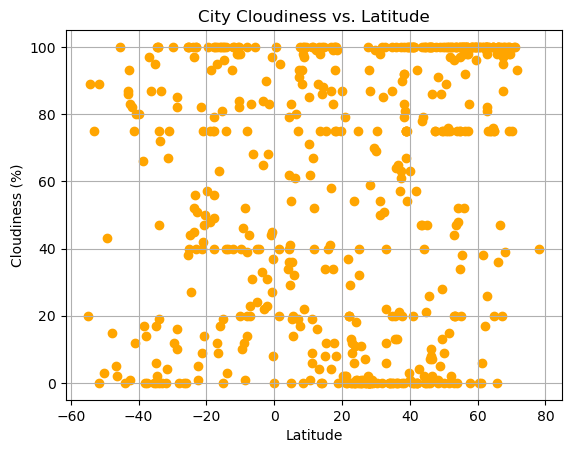

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness %'], marker='o', color='orange')

# Incorporate the other graph properties
plt.title("City Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

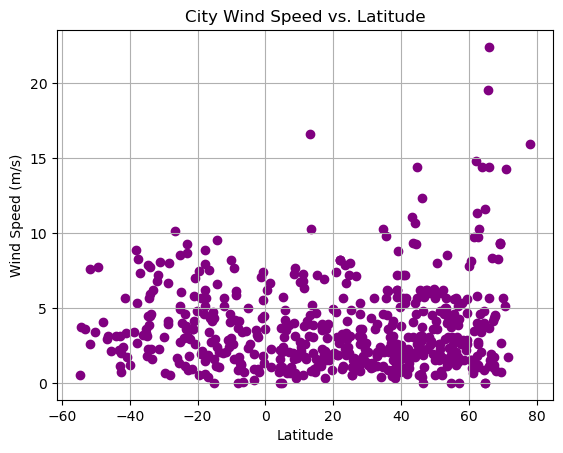

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed (m/s)'], marker='o', color='purple')

# Incorporate the other graph properties
plt.title("City Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [103]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate regression line
    regress_values = slope * x_values + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the equation and r-squared value
    plt.annotate(line_eq, (min(x_values), max(y_values) - 10), fontsize=15, color="coral")
    plt.text(min(x_values), max(y_values) - 20, f"R² = {round(r_value**2, 2)}", fontsize=15, color="orange")
    
    # Label the axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{y_label} vs. {x_label}")
    
    # Show plot
    plt.show()

In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Latitude'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp (°C),Humidity %,Cloudiness %,Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,berezovyy,51.6667,135.7000,-1.46,35,0,2.29,RU,1731469466
1,olonkinbyen,70.9221,-8.7187,-3.88,75,100,14.30,SJ,1731469467
3,grand falls-windsor,48.9332,-55.6649,5.28,92,100,2.68,CA,1731469325
6,hassi messaoud,31.6804,6.0729,12.92,62,0,1.03,DZ,1731469473
7,ribeira grande,38.5167,-28.7000,17.10,90,81,1.34,PT,1731469474


In [80]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Latitude'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp (°C),Humidity %,Cloudiness %,Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
2,margaret river,-33.9500,115.0667,22.60,51,47,4.46,AU,1731469469
4,waitangi,-43.9535,-176.5597,13.23,73,0,3.13,NZ,1731469471
5,port alfred,-33.5906,26.8910,16.21,82,72,2.24,ZA,1731469211
10,la foa,-21.7108,165.8276,28.49,53,82,0.90,NC,1731469478
14,afaahiti,-17.7500,-149.2833,23.87,76,56,7.93,PF,1731469482


###  Temperature vs. Latitude Linear Regression Plot

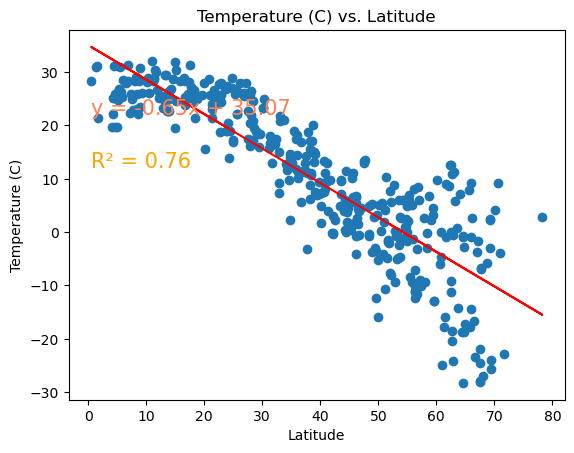

In [105]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Latitude'], northern_hemi_df['Max Temp (°C)'], 'Latitude', 'Temperature (C)')

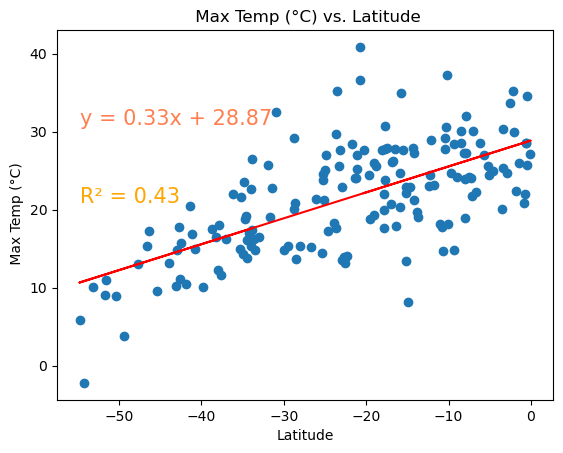

In [107]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Latitude'], southern_hemi_df['Max Temp (°C)'], 'Latitude', ' Max Temp (°C)')

**Discussion about the linear relationship:** 
    Here we are modeling temperatures at different latitudes.  
    We can see the closer you get to zero degrees latitude the warmer it gets and 
    the further you get away the colder it gets.

### Humidity vs. Latitude Linear Regression Plot

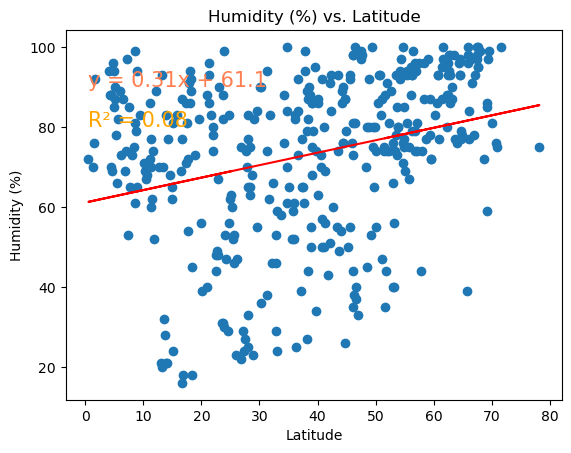

In [111]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Latitude'], northern_hemi_df['Humidity %'], 'Latitude', 'Humidity (%)')

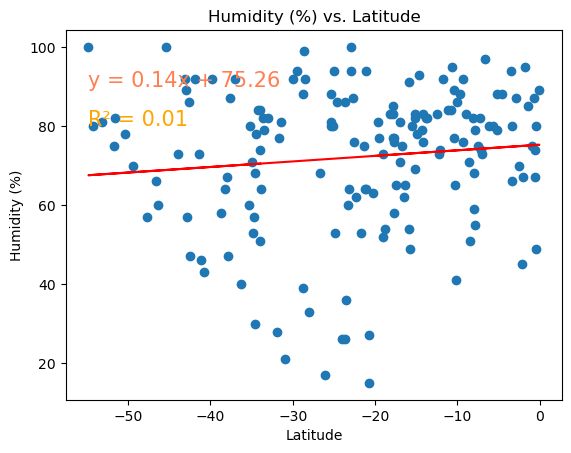

In [113]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Latitude'], southern_hemi_df['Humidity %'], 'Latitude', 'Humidity (%)')

**Discussion about the linear relationship:** Here we are modeling humidity at different latitudes.  It looks like on average a city would be anywhere between 60%-80% humid.  Cities that inland or coastal could be a reason why some at the same latitude have low or high humidity.

### Cloudiness vs. Latitude Linear Regression Plot

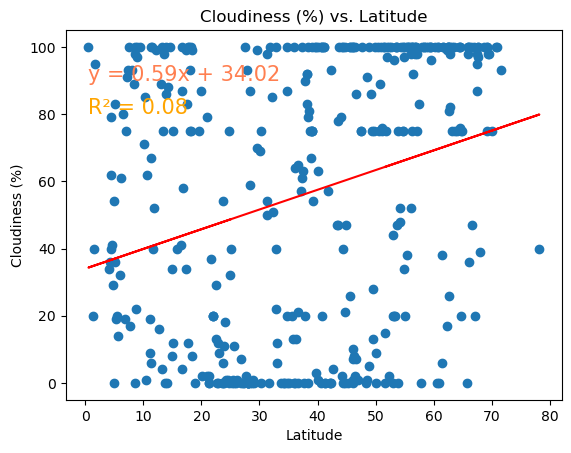

In [115]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Latitude'], northern_hemi_df['Cloudiness %'], 'Latitude', 'Cloudiness (%)')

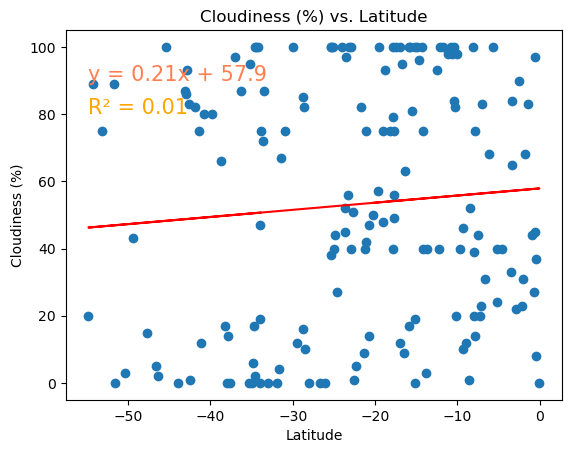

In [117]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Latitude'], southern_hemi_df['Cloudiness %'], 'Latitude', 'Cloudiness (%)')

**Discussion about the linear relationship:** Here we are modeling how cloudy it is at different latitudes.  There's a lot of cities of similar latitudes that are either cloudy all the time or usually clear skies.  Which is shown by how weak the regrerssion line is. 

### Wind Speed vs. Latitude Linear Regression Plot

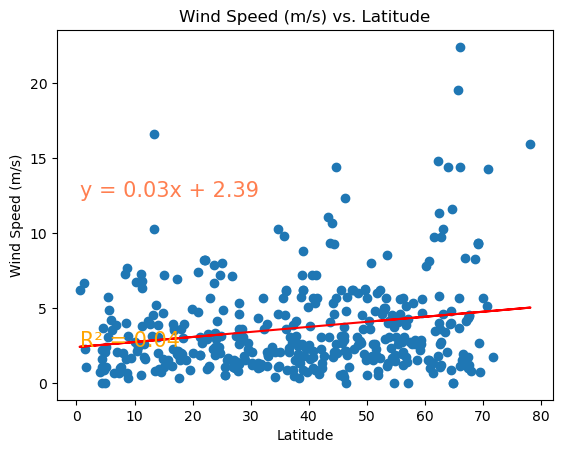

In [119]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Latitude'], northern_hemi_df['Wind Speed (m/s)'], 'Latitude', 'Wind Speed (m/s)')

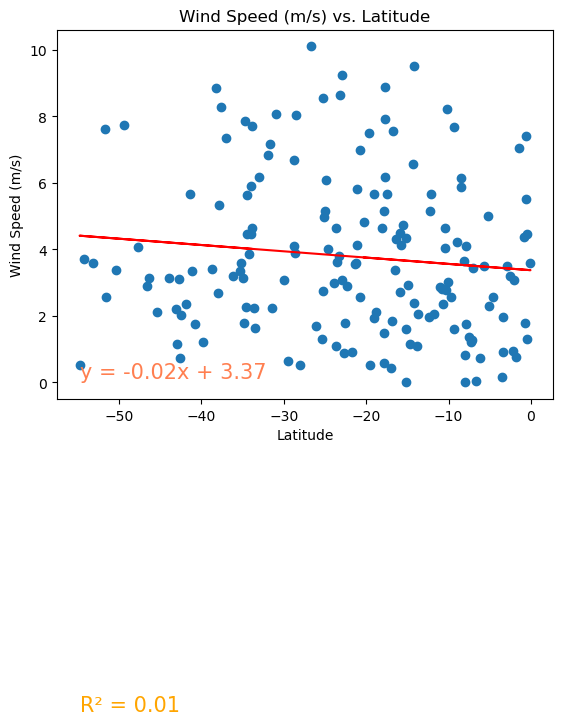

In [121]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Latitude'], southern_hemi_df['Wind Speed (m/s)'], 'Latitude', 'Wind Speed (m/s)')

**Discussion about the linear relationship:** Here we are modeling how windy it is at different latitudes. I noticed that at 60 degrees latitude and higher there are some spikes in wind speeds.  It would be interesting to see if there were inhabitable cities at -60 degrees latitude and lower if we would see the same spikes.